2024-01-11 16:39:16,612 - INFO - read_events.py:get_bti - Curve Started Above threshold! (but did not end above it)
2024-01-11 16:39:16,631 - INFO - read_events.py:get_bti - Curve Ended Above threshold! (but did not start above it)
2024-01-11 16:39:16,651 - INFO - read_events.py:get_bti - Curve Ended Above threshold! (but did not start above it)
2024-01-11 16:39:16,667 - INFO - read_events.py:get_bti - Curve Started Above threshold! (but did not end above it)
2024-01-11 16:39:16,685 - INFO - read_events.py:get_bti - Curve Started and Ended above threshold!
2024-01-11 16:39:16,704 - INFO - read_events.py:get_bti - Curve started and ended below threshold, nothing to do.
2024-01-11 16:39:16,722 - INFO - read_events.py:get_bti - All Values below Threshold! Entire observation is good :)
2024-01-11 16:39:16,738 - INFO - read_events.py:get_bti - All Values above Treshold! Entire observation is bad :(
2024-01-11 16:39:16,755 - INFO - read_events.py:get_bti - Curve started and ended below thres

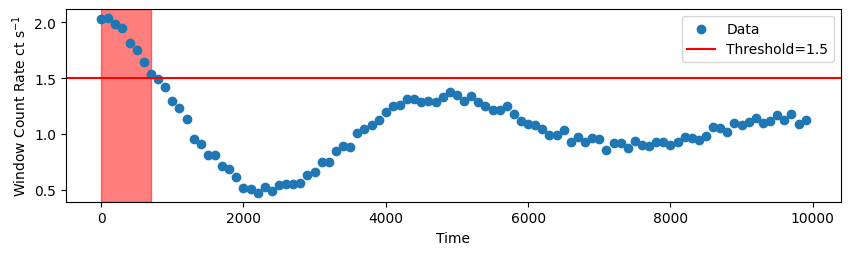

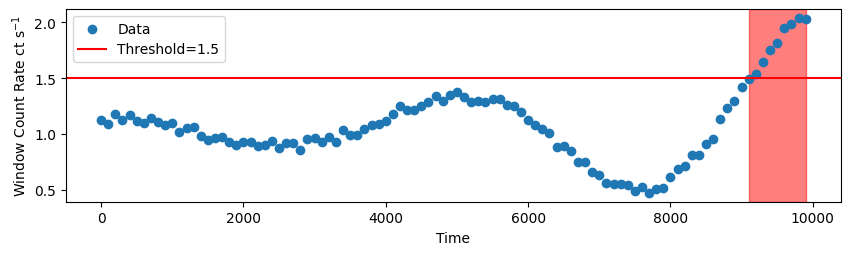

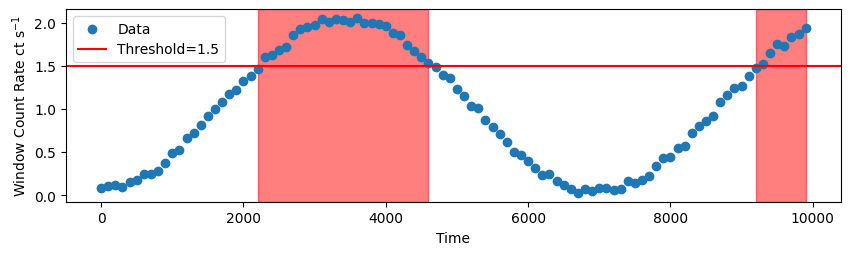

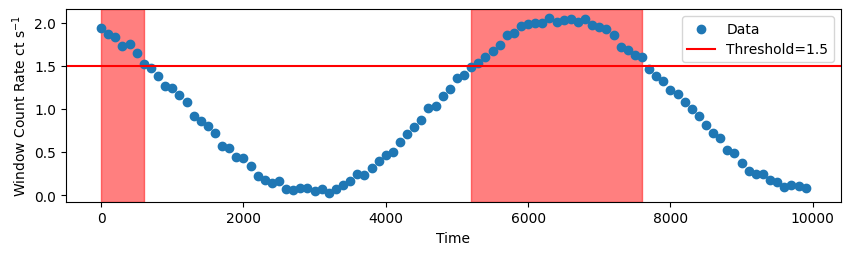

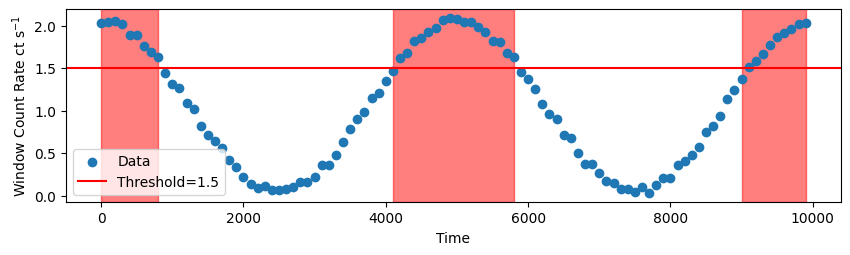

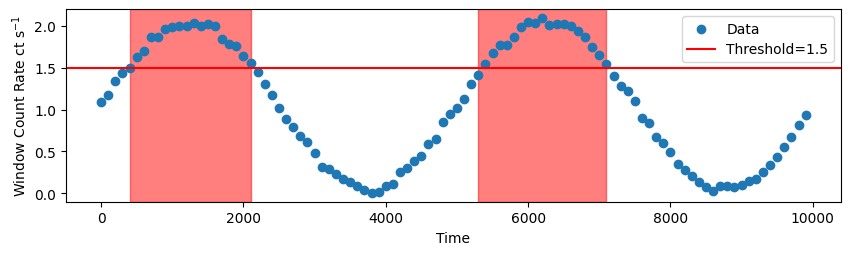

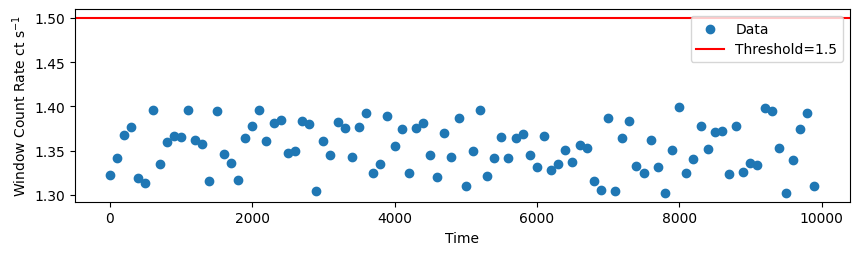

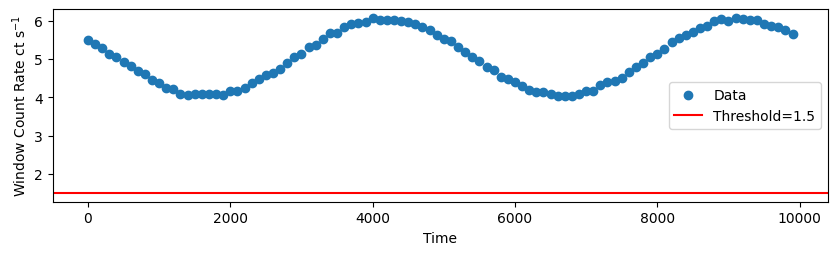

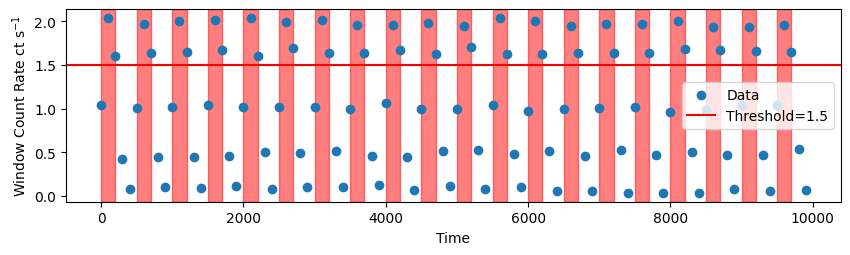

In [2]:
from exod.pre_processing.read_events import get_bti, plot_bti, get_rejected_idx
import numpy as np

time  = np.arange(0,10000,100)
time2 = np.arange(0,10000,33.33)

starts_above          = np.cos((2*3.14 / 5000)*time)* np.exp(-time/4000) + 1 + 0.1*np.random.random(size=len(time)) 
ends_above2           = np.flip(starts_above)
ends_above            = np.cos((2*3.14 / 7000)*time-600) + 1 + 0.1*np.random.random(size=len(time))
starts_above2         = np.flip(ends_above)
starts_and_ends_above = np.cos((2*3.14 / 5000)*time) + 1 + 0.1*np.random.random(size=len(time))
starts_and_ends_below = np.sin((2*3.14 / 5000)*time) + 1 + 0.1*np.random.random(size=len(time))

all_below             = 0.3*np.cos((2*3.14 / 5000)) + 1 + 0.1*np.random.random(size=len(time))
all_above             = np.cos((2*3.14 / 5000)*time-200) + 5 + 0.1*np.random.random(size=len(time))
high_freq             = np.sin((2*3.14 / 500)*time) + 1 + 0.1*np.random.random(size=len(time))

test_cases = [starts_above, ends_above2, ends_above, starts_above2, starts_and_ends_above, starts_and_ends_below,all_below, all_above,high_freq]

threshold = 1.5

for data in test_cases:
    threshold = 1.5
    bti = get_bti(time, data, threshold)
    rejected_idx = get_rejected_idx(bti, time2)
    plot_bti(time, data, threshold, bti)